In [655]:
import sys
import os
# Get the current script's directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Add the parent directory to sys.path
sys.path.append(parent_dir)
parent_dir

'd:\\algothon2025\\algothon2025'

In [656]:
import importlib
import preprocess
importlib.reload(preprocess)
import train_helper
importlib.reload(train_helper)

import pandas as pd
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator, StochasticOscillator, ROCIndicator, WilliamsRIndicator
from ta.trend import MACD
import numpy as np
from preprocess import preprocessTA
from train_helper import rolling_train_predict

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [657]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data.index = np.arange(data.shape[0])
data.rename(columns=lambda c: int(c), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,36.49,51.34,45.11,29.37,39.73,28.69,17.89,47.71,40.70,58.56,...,75.13,46.74,39.54,32.21,75.55,30.62,85.74,16.13,81.57,31.53
746,36.30,50.95,44.66,29.32,39.85,28.59,17.84,47.31,40.32,58.05,...,75.06,47.19,39.32,32.92,75.97,30.87,85.88,15.91,80.50,31.65
747,36.58,50.80,44.25,29.17,40.01,28.97,17.76,47.01,39.97,57.61,...,74.97,47.52,39.58,33.31,76.05,30.83,86.15,15.81,80.93,31.83
748,36.43,51.19,44.02,29.11,40.01,28.54,17.69,45.68,39.86,59.06,...,75.36,48.15,39.94,32.95,75.38,30.81,86.42,15.75,80.80,31.78


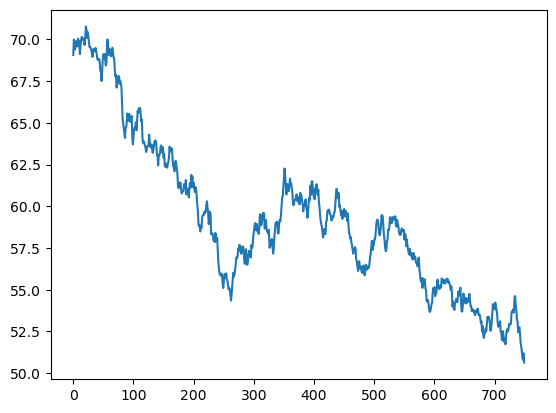

In [658]:
# Try out on 1
CHOSEN = 1
plt.plot(data[CHOSEN])

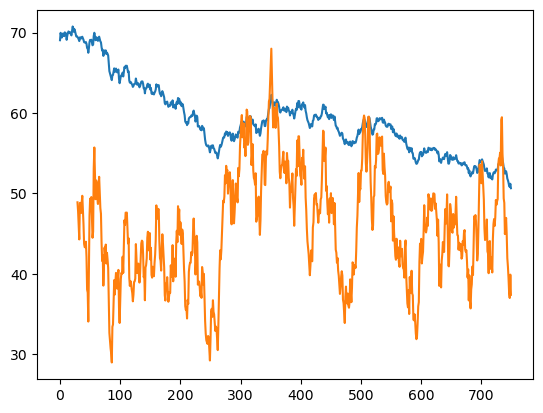

In [659]:
# Test RSI
rsi = RSIIndicator(close=data[CHOSEN], window=30)
rsi_series = rsi.rsi()
plt.plot(data[CHOSEN])
plt.plot(rsi_series)

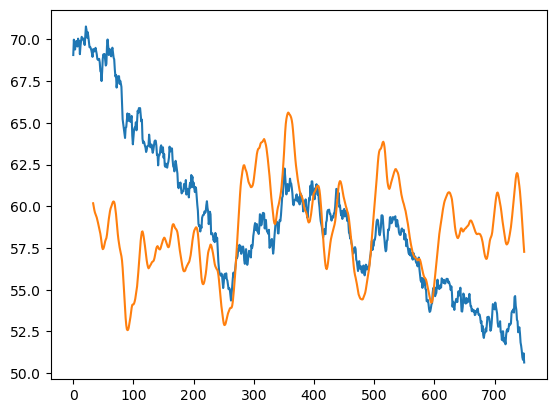

In [660]:
# Test MACD
macd = MACD(close=data[CHOSEN], window_slow=26, window_fast=12, window_sign=9)
macd_signal = macd.macd_signal() * 8 + 60
plt.plot(data[CHOSEN])
plt.plot(macd_signal)

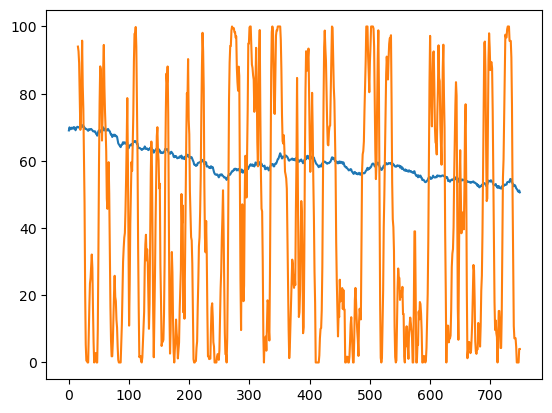

In [661]:
# Test stochastic oscillator
stoch_osc = StochasticOscillator(close=data[CHOSEN], high=data[CHOSEN], low=data[CHOSEN], window=14, smooth_window=3)
stoch_sign = stoch_osc.stoch_signal()
plt.plot(data[CHOSEN])
plt.plot(stoch_sign)

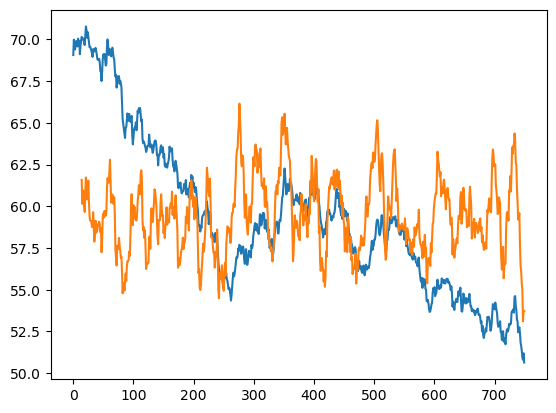

In [662]:
# ROC indicator
roc = ROCIndicator(close=data[CHOSEN], window=14)
roc_vals = roc.roc() + 60
plt.plot(data[CHOSEN])
plt.plot(roc_vals)

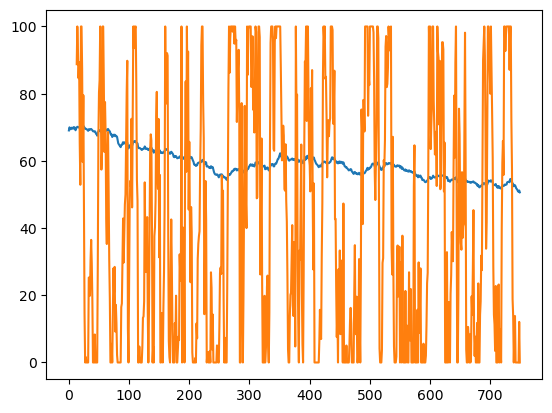

In [663]:
# Testing WilliamsRIndicator
williamR = WilliamsRIndicator(high=data[CHOSEN], low=data[CHOSEN], close=data[CHOSEN], lbp=14)
williamR_vals = williamR.williams_r() + 100
plt.plot(data[CHOSEN])
plt.plot(williamR_vals)

In [664]:
# Test on chosen
X_df, y_df = preprocessTA(price_df=data, stock=CHOSEN)

In [665]:
X_df

,price_1,rsi_1,macd_1,stoch_1,roc_1,williamR_1,price_2,rsi_2,macd_2,stoch_2,...,macd_6,stoch_6,roc_6,williamR_6,price_7,rsi_7,macd_7,stoch_7,roc_7,williamR_7
30,69.47,41.117771,-0.072527,0.647249,-0.501289,-100.000000,69.55,42.487280,-0.030614,0.647249,...,0.127281,63.363363,-0.480430,-20.481928,70.10,52.842130,0.127901,73.573574,-0.156673,-40.361446
31,69.35,39.021450,-0.108101,0.647249,-0.258881,-100.000000,69.47,41.117771,-0.072527,0.647249,...,0.111851,51.651652,-0.552721,-51.282051,70.43,58.174606,0.127281,63.363363,-0.480430,-20.481928
32,69.17,35.965390,-0.141450,0.000000,-0.546370,-100.000000,69.35,39.021450,-0.108101,0.647249,...,0.074059,38.438438,-0.399429,-85.585586,70.17,52.934605,0.111851,51.651652,-0.552721,-51.282051
33,68.95,32.507942,-0.175843,0.000000,-0.748525,-100.000000,69.17,35.965390,-0.141450,0.000000,...,0.019247,15.315315,-1.277865,-100.000000,69.82,46.649697,0.074059,38.438438,-0.399429,-85.585586
34,69.41,44.829611,-0.177231,25.555556,0.086518,-74.725275,68.95,32.507942,-0.175843,0.000000,...,-0.030614,0.647249,-0.883568,-98.387097,69.53,42.053021,0.019247,15.315315,-1.277865,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,52.45,35.135080,0.004280,0.000000,-2.491169,-100.000000,53.11,44.032560,0.112551,5.387205,...,0.320214,92.592593,1.467583,-0.000000,54.56,76.708403,0.283008,92.592593,1.563663,-0.000000
741,52.62,38.681168,-0.082716,2.611367,-1.090226,-92.165899,52.45,35.135080,0.004280,0.000000,...,0.315034,80.134680,0.745851,-27.830189,54.62,77.263985,0.320214,92.592593,1.467583,-0.000000
742,52.75,41.403033,-0.137042,8.940481,-0.677838,-86.175115,52.62,38.681168,-0.082716,2.611367,...,0.276949,52.188552,-1.411290,-42.131980,54.03,61.290476,0.315034,80.134680,0.745851,-27.830189
743,52.39,36.427710,-0.184475,8.940481,-0.114395,-100.000000,52.75,41.403033,-0.137042,8.940481,...,0.198815,18.855219,-2.599780,-81.142857,53.79,56.052815,0.276949,52.188552,-1.411290,-42.131980


In [666]:
y_df

30    -1
31     1
32     1
33    -1
34    -1
      ..
740   -1
741   -1
742   -1
743   -1
744   -1
Length: 715, dtype: int64

In [667]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=2605, shuffle=True, test_size=0.2, stratify=y_df)
X_train

# total = X_df.shape[0]
# train_size = int(total * 0.8)
# X_train = X_df.iloc[:train_size]
# y_train = y_df[:train_size]
# X_test = X_df[train_size:]
# y_test = y_df[train_size:]

,price_1,rsi_1,macd_1,stoch_1,roc_1,williamR_1,price_2,rsi_2,macd_2,stoch_2,...,macd_6,stoch_6,roc_6,williamR_6,price_7,rsi_7,macd_7,stoch_7,roc_7,williamR_7
99,64.24,31.904633,-0.099876,38.822695,-1.260375,-89.795918,65.41,45.992140,-0.067104,38.822695,...,-0.190011,84.097980,-0.045760,-52.941176,65.36,42.417436,-0.267480,85.260771,0.276158,-61.162080
61,69.43,55.423390,0.157258,59.401709,-0.800114,-22.489960,69.06,50.464942,0.159852,71.367521,...,0.001245,41.491701,-0.868056,-37.037037,68.43,42.652211,0.013306,70.477208,-0.854825,-42.592593
585,55.62,41.498088,-0.238685,51.299435,-0.089815,-71.978022,55.39,36.520719,-0.270231,39.152542,...,-0.260428,5.442177,-0.375604,-84.313725,55.46,24.681386,-0.240692,0.000000,-1.369376,-100.000000
709,52.83,38.579865,-0.109750,2.252874,-0.358355,-96.551724,52.82,38.312750,-0.060761,0.919540,...,0.201832,56.410256,-0.037161,-25.443787,54.03,61.170295,0.222454,82.632479,0.185426,-11.834320
595,53.89,28.986573,-0.353346,12.037037,0.092868,-89.000000,53.71,23.209905,-0.369779,1.851852,...,-0.313554,2.272727,-1.109091,-94.409938,54.30,26.510565,-0.296339,0.000000,-1.362398,-100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,60.65,52.243130,-0.013192,83.574879,0.898353,-20.270270,60.61,51.460781,-0.034292,57.487923,...,-0.091029,34.001193,-0.280020,-64.179104,60.28,43.429328,-0.106028,47.179487,-0.429468,-86.163522
518,57.98,41.156654,0.055248,15.555556,-2.407002,-100.000000,58.31,46.134280,0.139824,47.500000,...,0.180332,57.092199,2.042568,-0.000000,58.74,62.659377,0.166901,23.758865,0.564972,-29.299363
285,56.75,45.612827,0.133453,46.001074,-1.287180,-100.000000,57.41,60.562413,0.196785,66.988728,...,0.329551,64.695510,-0.936037,-28.421053,57.61,71.533664,0.374047,91.561181,0.523469,-3.980100
53,69.12,55.766178,-0.013124,98.333333,0.421328,-0.000000,69.02,54.015060,-0.077636,98.333333,...,-0.267161,0.000000,-1.617840,-100.000000,68.04,22.083968,-0.217903,0.000000,-1.147755,-100.000000


In [668]:
# Make a random forest
randomForest = RandomForestClassifier(n_estimators=200, max_depth=10)


In [669]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [670]:
y_pred = randomForest.predict(X_test)

Accuracy:  0.6783216783216783


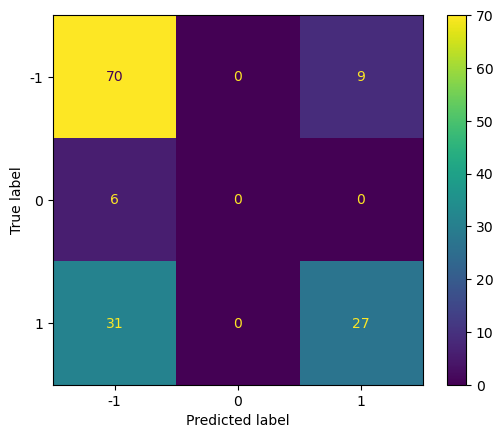

In [671]:
print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=y_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ConfusionMatrixDisplay(cm, display_labels=randomForest.classes_).plot()

In [672]:
y_true, y_pred = rolling_train_predict(randomForest, X_df, y_df, window=100)

[[0.65  0.095 0.255]]
[[0.39  0.165 0.445]]
[[0.325 0.13  0.545]]
[[0.195 0.165 0.64 ]]
[[0.185 0.18  0.635]]
[[0.33666667 0.14       0.52333333]]
[[0.475 0.065 0.46 ]]
[[0.515 0.1   0.385]]
[[0.4775 0.135  0.3875]]
[[0.55 0.07 0.38]]
[[0.51  0.035 0.455]]
[[0.4325 0.05   0.5175]]
[[0.355 0.125 0.52 ]]
[[0.385 0.125 0.49 ]]
[[0.505 0.085 0.41 ]]
[[0.515 0.08  0.405]]
[[0.7  0.04 0.26]]
[[0.56666667 0.065      0.36833333]]
[[0.39  0.065 0.545]]
[[0.52  0.045 0.435]]
[[0.41  0.025 0.565]]
[[0.51  0.005 0.485]]
[[0.4855 0.01   0.5045]]
[[0.42 0.01 0.57]]
[[0.39 0.02 0.59]]
[[0.345 0.05  0.605]]
[[0.43  0.065 0.505]]
[[0.455 0.04  0.505]]
[[0.585 0.06  0.355]]
[[0.725 0.025 0.25 ]]
[[0.82  0.015 0.165]]
[[0.885 0.01  0.105]]
[[0.805 0.03  0.165]]
[[0.84 0.01 0.15]]
[[0.85 0.01 0.14]]
[[0.735 0.02  0.245]]
[[0.49  0.055 0.455]]
[[0.33  0.035 0.635]]
[[0.395 0.035 0.57 ]]
[[0.32  0.135 0.545]]
[[0.37  0.075 0.555]]
[[0.51625 0.04    0.44375]]
[[0.55  0.035 0.415]]
[[0.37333333 0.075      0.5

KeyboardInterrupt: 

In [ ]:
len(y_true), len(y_pred)

(614, 614)

Accuracy:  0.5537459283387622


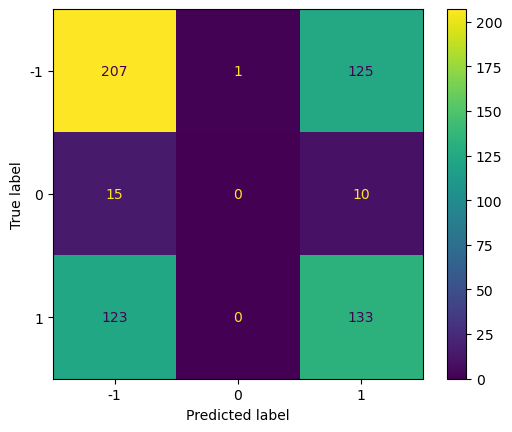

In [ ]:
print("Accuracy: ", accuracy_score(y_true=y_true, y_pred=y_pred))
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
ConfusionMatrixDisplay(cm, display_labels=randomForest.classes_).plot()